In [136]:
# Importing Major Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [2]:
# importing the Dataset

df=pd.read_csv('Titanic-Dataset.csv')

In [4]:
df.head() # We have to predict whether the person survived or not.
# 0 indicates- Not Survived
# 1 indicates- Survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Checking the Shape of Dataset
df.shape

(891, 11)

In [5]:
# Dropping the Column 'PassengerId' since this column is not useful for prediction
df.drop('PassengerId',axis=1,inplace=True)

In [104]:
df.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

# Dealing With Null Values

In [8]:
# Checking for null values

df.isnull().sum() # As we see there are null values in Age, Cabin, and Embarked. So, first we have to deal with those null valuse and fill them accordingly.

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# Checking Dtypes
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [13]:
df.Age # Since the Age contains values in float so we can fill null values with its mean

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
# Filling Null values with its mean

df.Age.fillna(df.Age.mean(),inplace=True)

In [19]:
# Dealing with 'Cabin' Column. 
df.Cabin.value_counts().count() # Since the 'Cabin' column is object we can fill null values only with the mode. but the count of null values is very high. so its better to drop that column in order to maintain accuracy

147

In [20]:
# Dropping 'Cabin' Column:
df.drop('Cabin',axis=1,inplace=True)

In [28]:
# Dealing with the column name 'Embarked'

df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

In [31]:
# Checking the Null Values
df.isnull().sum() # Null values sucessfully filled.

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Exploring The Dataset

In [32]:
# Checking the balancing of the Dataset
df.Survived.value_counts() # Data is imbalanced, which results in biased results, so, we have to use under-sampeling technique to balance the Dataset.

Survived
0    549
1    342
Name: count, dtype: int64

In [33]:
df[df.Age<10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,S
16,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
24,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,S
43,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,C
...,...,...,...,...,...,...,...,...,...,...
827,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,C
831,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S
850,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,S
852,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,C


# EDA(Exploratory Data Analysis)


([<matplotlib.patches.Wedge at 0x207de577dd0>,
 [Text(-0.3924814551703353, -1.134001017348475, 'Not Survived'),
  Text(0.3597745699143713, 1.039500966253966, 'Survived')],
 [Text(-0.22894751551602888, -0.661500593453277, '61.6%'),
  Text(0.19624067449874796, 0.5670005270476178, '38.4%')])

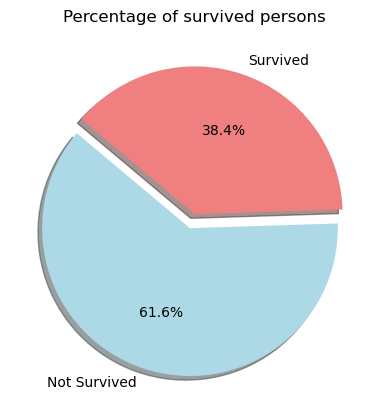

In [70]:
# Percentage of survived persons(pie)
plt.title('Percentage of survived persons')
plt.pie(df.Survived.value_counts(),labels=['Not Survived','Survived'],autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'], explode=(0.1, 0), shadow=True)

Text(0, 0.5, 'Count')

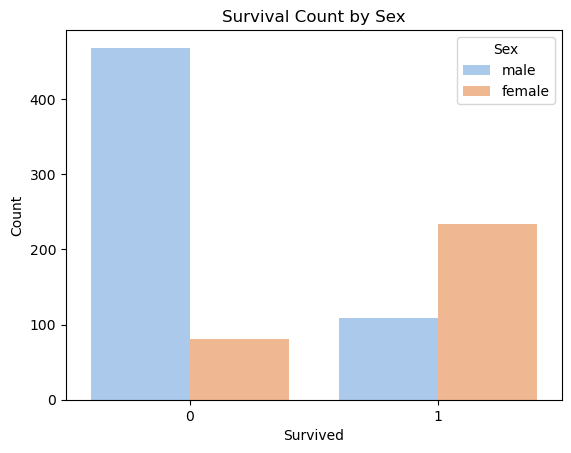

In [73]:
# Survival Count by Sex

sns.countplot(x='Survived', hue='Sex', data=df, palette='pastel')
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')

Sex
male      577
female    314
Name: count, dtype: int64

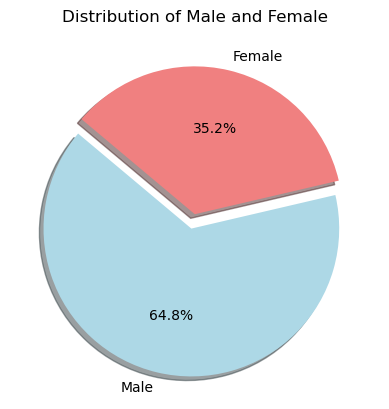

In [68]:
# Distribution of Male and Female

#plt.figure(figsize=(8, 8))
plt.pie(df.Sex.value_counts(), labels=['Male','Female'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'], explode=(0.1, 0), shadow=True)
plt.title('Distribution of Male and Female')
df.Sex.value_counts()

<Axes: xlabel='Age', ylabel='Count'>

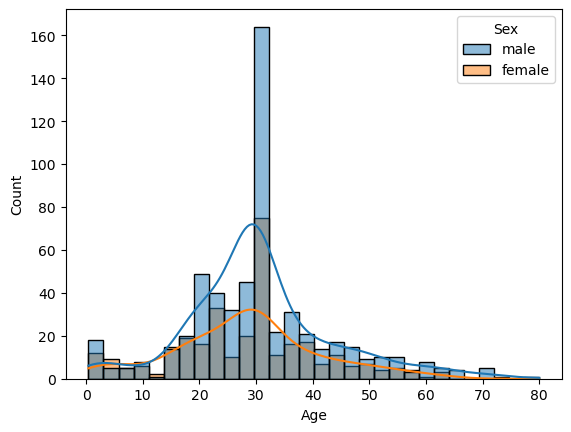

In [72]:
# Distribution of Age

sns.histplot(data=df, x='Age', hue='Sex', kde=True)

<Axes: xlabel='Embarked', ylabel='count'>

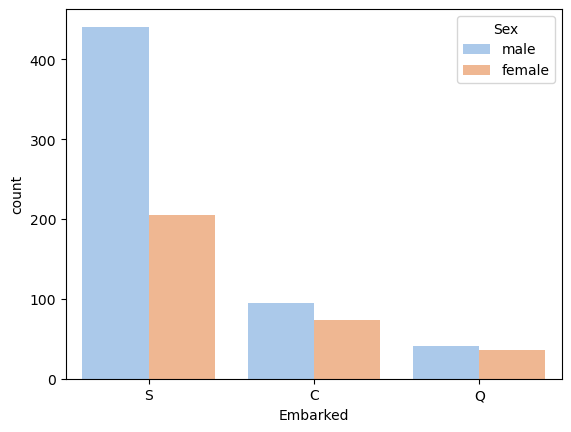

In [77]:
# Distribution of Embarked

sns.countplot(x=df.Embarked,hue=df.Sex,palette='pastel')

# Prediction 

In [93]:
# Using Label Encoder to Encode 'Embarked'

le=LabelEncoder()
df.Embarked=le.fit_transform(df.Embarked)
df.Sex=le.fit_transform(df.Sex)


In [94]:
# Creating Dependent And Independent Variable

x=df.drop(['Survived','Name'],axis=1)
y=df.Survived

In [95]:
# Using Undersampeling Technique to get non-biased results by equalising the classification of 'Survived' column

us=RandomUnderSampler()
x_resample,y_resample=us.fit_resample(x,y)

In [96]:
x_resample.reset_index(drop=True)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,26.000000,0,0,7.8958,2
1,2,0,24.000000,0,0,13.0000,2
2,3,1,45.000000,0,0,6.9750,2
3,3,1,29.699118,0,0,7.2292,0
4,3,1,29.699118,0,0,7.8958,2
...,...,...,...,...,...,...,...
679,3,0,15.000000,0,0,7.2250,0
680,1,0,56.000000,0,1,83.1583,0
681,2,0,25.000000,0,1,26.0000,2
682,1,0,19.000000,0,0,30.0000,2


In [97]:
y_resample.value_counts().reset_index(drop=True)

0    342
1    342
Name: count, dtype: int64

In [98]:
# splitting Training and testing Data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=46)

In [132]:
# assigning the varaible to Algorithm(Random forest classifier)
rfc=RandomForestClassifier(n_estimators=100, max_depth=5)

In [133]:
# fitting the training data into Algo
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [134]:
# Model prediction

y_pred=rfc.predict(x_test)

In [138]:
# Checking the Accuracy
accuracy_score(y_test,y_pred)

0.8435754189944135

In [140]:
# Checking the Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       104
           1       0.89      0.72      0.79        75

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.83       179
weighted avg       0.85      0.84      0.84       179



In [160]:
# Checking Feature Importance

fea_imp=pd.Series(rfc.feature_importances_,index=x_test.columns).sort_values(ascending=False).round(2)
fea_importance=pd.DataFrame({'column':fea_imp.index,'contribtion_in_%':fea_imp}).reset_index(drop=True)

,column,contribtion_in_%
0,Sex,0.43
1,Fare,0.18
2,Pclass,0.14
3,Age,0.12
4,SibSp,0.06
5,Parch,0.04
6,Embarked,0.03


([<matplotlib.patches.Wedge at 0x207e694f690>,
 [Text(0.23995754141400957, 1.0735084435245696, 'Sex'),
  Text(-1.0913261621521642, -0.1378666304884122, 'Fare'),
  Text(-0.46835712939770585, -0.9953098006863695, 'Pclass'),
  Text(0.404937095092153, -1.0227540999762987, 'Age'),
  Text(0.8899187407275839, -0.6465637129485627, 'SibSp'),
  Text(1.0461621902025062, -0.33991862524830185, 'Parch'),
  Text(1.0951181673390609, -0.10351907826066103, 'Embarked')],
 [Text(0.13088593168036883, 0.5855500601043107, '43.0%'),
  Text(-0.5952688157193622, -0.07519998026640663, '18.0%'),
  Text(-0.25546752512602133, -0.5428962549198378, '14.0%'),
  Text(0.22087477914117432, -0.5578658727143447, '12.0%'),
  Text(0.4854102222150457, -0.35267111615376145, '6.0%'),
  Text(0.5706339219286397, -0.18541015922634643, '4.0%'),
  Text(0.5973371821849423, -0.05646495177854237, '3.0%')])

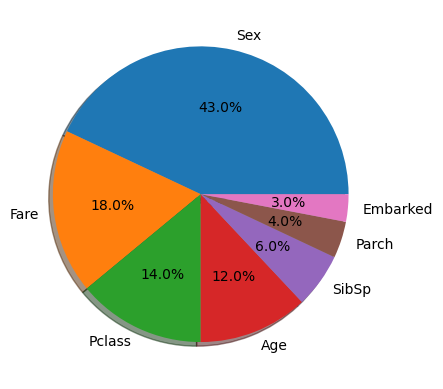

In [166]:
plt.pie(fea_importance['contribtion_in_%'],labels=fea_importance.column,autopct='%1.1f%%',shadow=True)